In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn import metrics
from sklearn import preprocessing

In [2]:
athleteData = pd.read_csv('athlete_events.csv')
athleteData

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [3]:
athleteData['Medal'].fillna('No Medal', inplace = True)
athleteData.head()


athleteData['Medal'] = athleteData['Medal'].replace({'Bronze':'Medal Winner', 'Silver':'Medal Winner', 'Gold':'Medal Winner'})
athleteData.head()

winner_data = athleteData.dropna(subset = ['Medal','Height','Weight','Age'])
winner_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No Medal


In [4]:
numeric_data = pd.DataFrame(winner_data[["Age", "Height", "Weight"]])
numeric_data.describe().round(2)

,Age,Height,Weight
count,206165.00,206165.00,206165.00
mean,25.06,175.37,70.69
std,5.48,10.55,14.34
min,11.00,127.00,25.00
25%,21.00,168.00,60.00
50%,24.00,175.00,70.00
75%,28.00,183.00,79.00
max,71.00,226.00,214.00


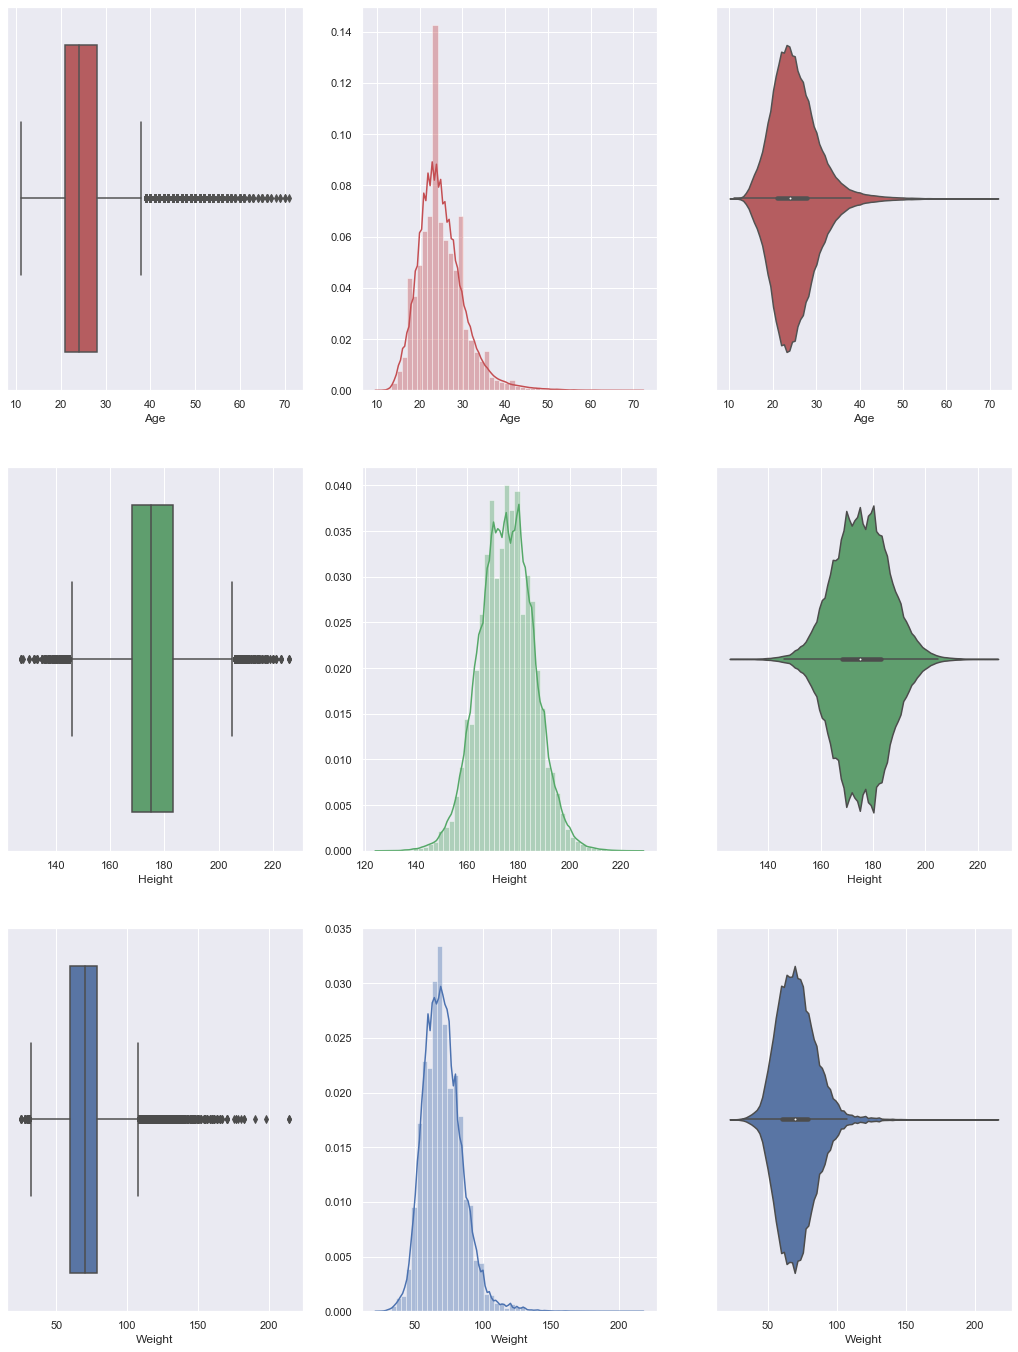

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 24))
colors = ["r", "g", "b"]

count = 0
for var in numeric_data:
    sb.boxplot(numeric_data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numeric_data[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numeric_data[var], color = colors[count], ax = axes[count,2])
    count += 1

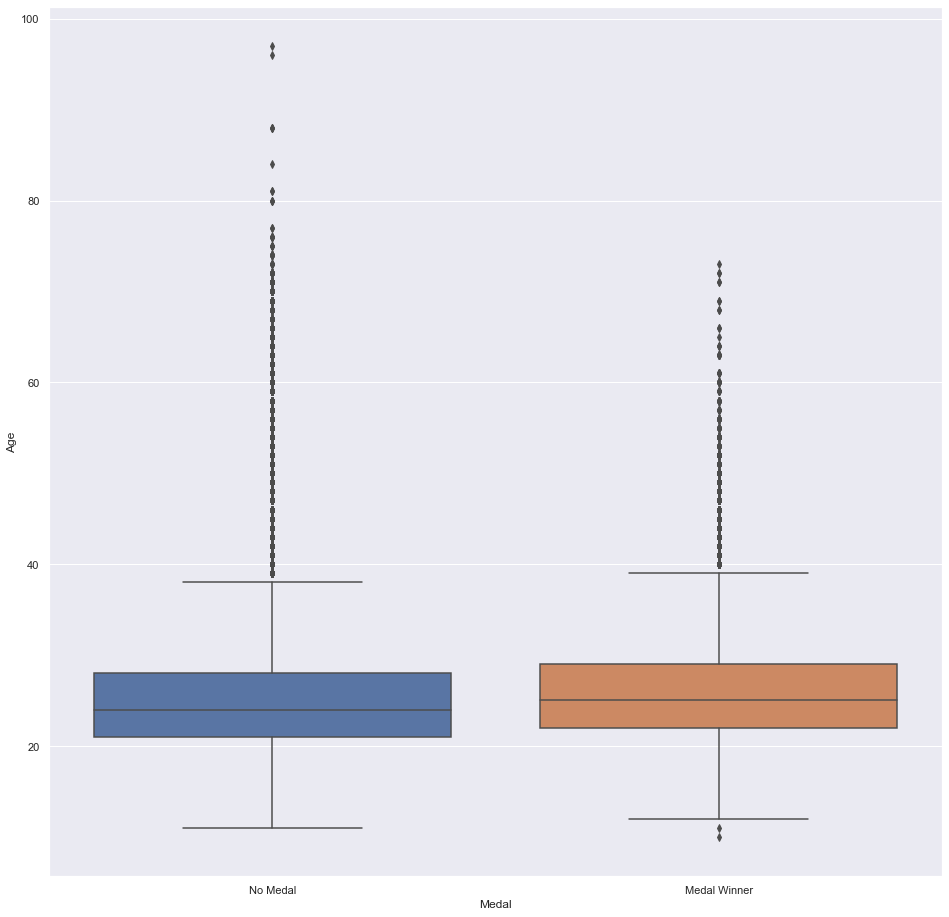

In [6]:
#Brandons exploration, classifys by medal
athleteNumData = pd.DataFrame(athleteData[['Age', 'Height', 'Weight',]])

athleteCatData = pd.DataFrame(athleteData['Medal'])

athleteCatMedal = pd.concat([athleteNumData, athleteCatData], axis = 1, join_axes = [athleteNumData.index])

f, axes = plt.subplots(1, 1, figsize=(16, 16))
sb.boxplot(x = 'Medal', y = 'Age', data = athleteCatMedal)


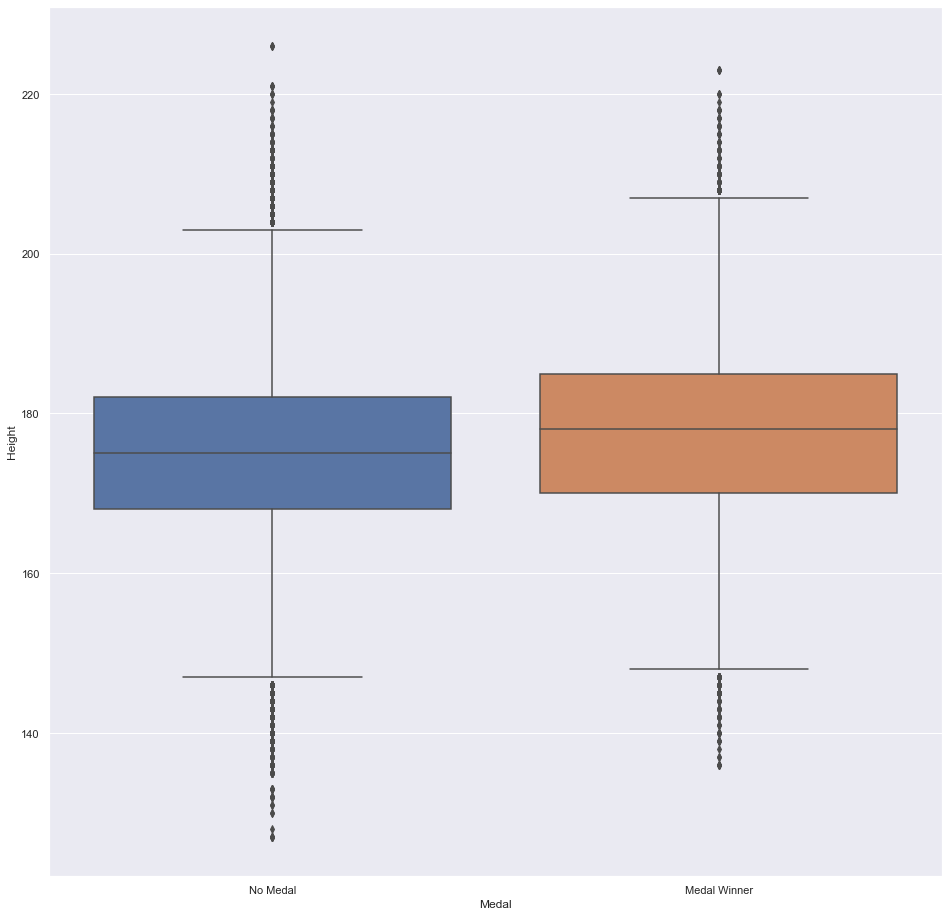

In [7]:
f, axes = plt.subplots(1, 1, figsize=(16, 16))
sb.boxplot(x = 'Medal', y = 'Height', data = athleteCatMedal)

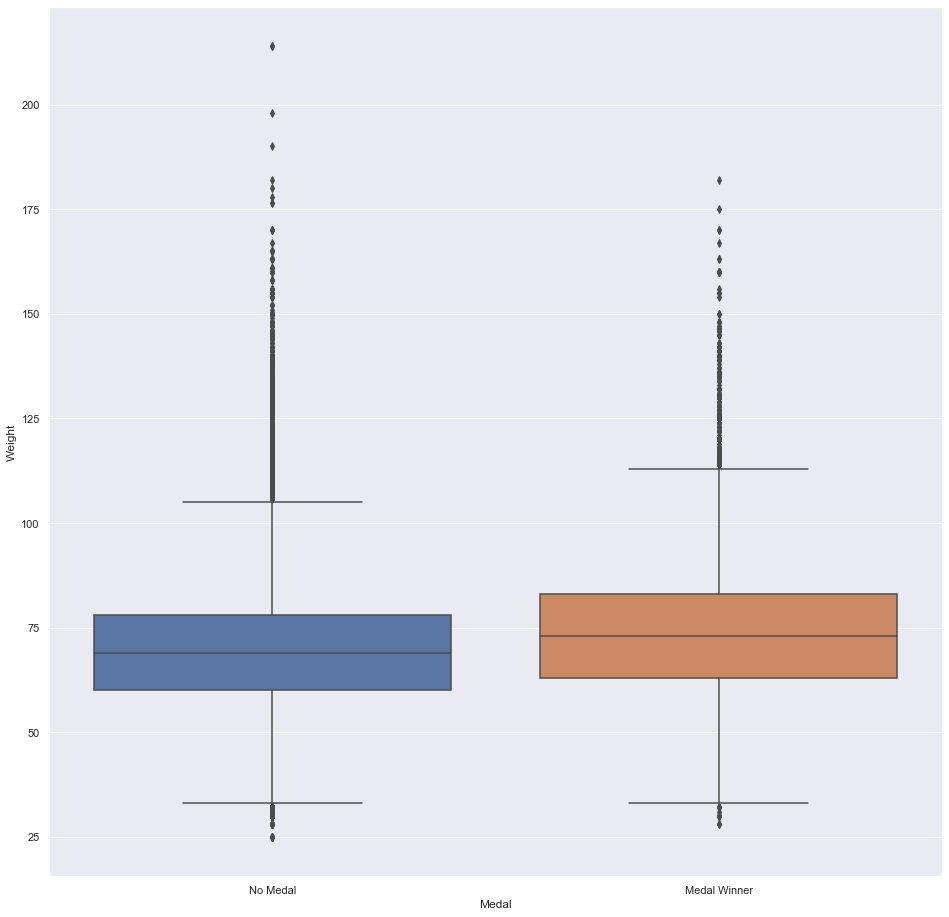

In [8]:
f, axes = plt.subplots(1, 1, figsize=(16, 16))
sb.boxplot(x = 'Medal', y = 'Weight', data = athleteCatMedal)

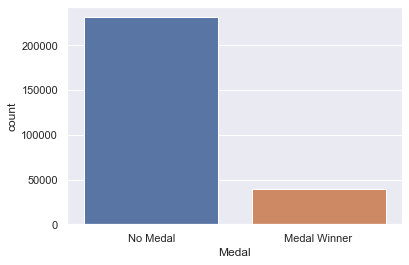

In [9]:
sb.countplot(x='Medal',data=athleteCatMedal)

In [10]:
#Process catergorical variables to allow it to be processesed by the tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

y = pd.DataFrame(winner_data['Medal'])
X = pd.DataFrame(winner_data[["Age", "Height", "Weight", "Team"]]) 
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8606031576649771

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8575655421628308



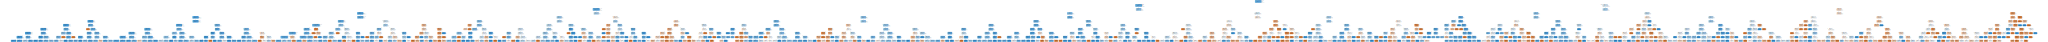

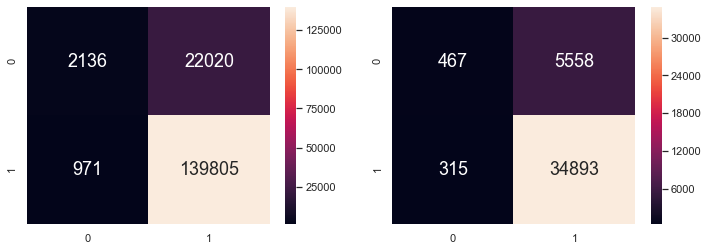

In [11]:
# Extract Response and Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Yea so to measure correlation for this we have to go about it in a slightly diff way 
 this is cause our independent variable (MEDAL) is categorical so we gone use these:
1:Two categorical variable use Chi-square
2:Two or more quantitative variable (Continuous or discrete) use Pearson correlation (r),
3:One categorical and one quantitative variable (Continuous or discrete) use ANOVA.
4: 0ne cat one quant also can use smthg called logistic regression

In [12]:
#Just gonna import again as its easier
athleteData = pd.read_csv('athlete_events.csv')
athleteData

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [13]:
#Making the categorical Binary so as to apply logistic regression
athleteData['Medal'].fillna(0, inplace = True)
athleteData.head()


athleteData['Medal'] = athleteData['Medal'].replace({'Bronze':1, 'Silver':1, 'Gold':1})
athleteData.head()

winner_data = athleteData.dropna(subset = ['Medal','Height','Weight','Age'])
winner_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,0


In [14]:
winner_data.groupby('Medal').mean()

,ID,Age,Height,Weight,Year
Medal,,,,,
0,68339.916691,24.991454,174.982578,70.162657,1989.960860
1,70225.949604,25.429012,177.642358,73.753554,1988.005964


In [15]:
winner_data.groupby('Medal').agg(pd.Series.mode)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
Medal,,,,,,,,,,,,,,
0,115354,"Joseph ""Josy"" Stoffel",M,23.0,180.0,70.0,United States,USA,2000 Summer,1988,Summer,Sydney,Athletics,Ice Hockey Men's Ice Hockey
1,94406,"Michael Fred Phelps, II",M,23.0,180.0,70.0,United States,USA,2008 Summer,2008,Summer,London,Athletics,Ice Hockey Men's Ice Hockey


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
y = pd.DataFrame(winner_data['Medal'])
X = pd.DataFrame(winner_data[["Age", "Height", "Weight", "Team"]]) 
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

#Over-sampling

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

#RFE step

#winner_data_vars=winner_data.columns.values.tolist()
#y=['y']
#X=[i for i in winner_data_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [16]:

y = pd.DataFrame(winner_data['Medal'])
X = pd.DataFrame(winner_data[["Age", "Height", "Weight", "Team"]]) 
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'lbfgs')
logmodel.fit(X_train,y_train)
y_train_pred = logmodel.predict(X_train)
y_test_pred = logmodel.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     52650
           1       0.56      0.02      0.05      9200

    accuracy                           0.85     61850
   macro avg       0.71      0.51      0.48     61850
weighted avg       0.81      0.85      0.79     61850



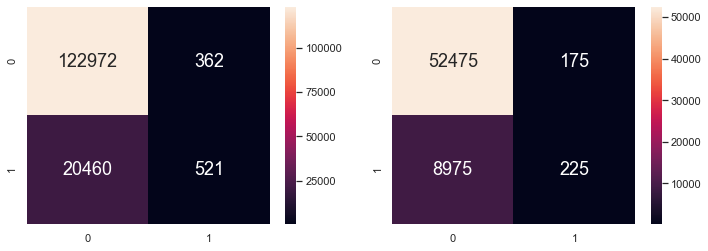

In [20]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])